In [1]:
import pandas as pd
import numpy as np
from math import log 
from collections import Counter
from matplotlib import pyplot as plt

### Two Class

In [2]:
def gini(p):
    return (p)*(1 - (p)) + (1 - p)*(1 - (1-p))

def entropy(p):
    return - p*np.log2(p) - (1 - p)*np.log2((1 - p))

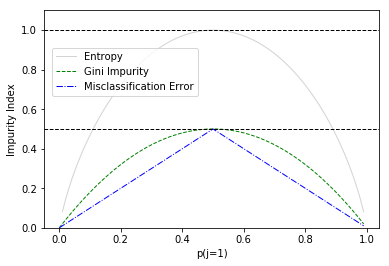

In [3]:
def classification_error(p):
    return 1 - np.max([p, 1 - p])

x = np.arange(0.0, 1.0, 0.01)
ent = [entropy(p) if p != 0 else None for p in x]
c_err = [classification_error(i) for i in x]

fig = plt.figure()
ax = plt.subplot(111)

for j, lab, ls, c, in zip(
      [ent, gini(x), c_err],
      ['Entropy', 'Gini Impurity', 'Misclassification Error'],
      ['-', '--', '-.'],
      ['lightgray', 'green', 'blue']):
    line = ax.plot(x, j, label=lab, linestyle=ls, lw=1, color=c)

ax.legend(loc='upper left', bbox_to_anchor=(0.01, 0.85),
         ncol=1, fancybox=True, shadow=False)

ax.axhline(y=0.5, linewidth=1, color='k', linestyle='--')
ax.axhline(y=1.0, linewidth=1, color='k', linestyle='--')

plt.ylim([0, 1.1])
plt.xlabel('p(j=1)')
plt.ylabel('Impurity Index')
plt.show()

### Multiple Class

#### Entropy
* More commonly used.
* The lower the better.
* entropy peaks more slowly. Consequently, it tends to penalize mixed sets a little more heavily
<img src="figs/entropy.png" alt="Drawing" style="height: 80px;"/>

In [4]:
def entropy(labels):
    log2 = lambda x:log(x) / log(2) 
    results = Counter(labels) 
    ent = 0.0
    for r in results.keys():
        p = float(results[r]) / len(labels)
        ent = ent - p * log2(p)
    return ent

In [5]:
results = np.asarray([0] * 100 + [1] * 1)
entropy(results)

0.08013604733127526

#### Uniform class distribution
* As number of classes increases, entropy has no upper bound
* Maximized when classes are uniformly split

In [6]:
entropy([i for i in range(10)])

3.321928094887362

In [7]:
entropy([i for i in range(100000)])

16.60964047441802

In [8]:
# try different number of classes at 100 increment
classes = [c * 1000 for c in range(100)]

entropies = [entropy([i for i in range(c)]) for c in classes]

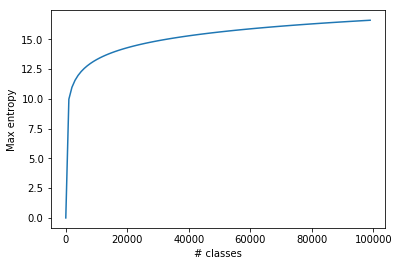

In [9]:
plt.plot(classes, entropies)
plt.xlabel('# classes')
plt.ylabel('Max entropy')
plt.show()

#### Gini Impurity
* The lower the better
* Gini impurity is a measure of how often a randomly chosen element from the set would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the subset. 
<img src="figs/gini_impurity.png" alt="Drawing" style="height: 90px;"/>

In [10]:
def giniimpurity1(rows):
    total = len(rows)
    counts = Counter(rows)
    imp = 0
    for k1 in counts:
        p1 = float(counts[k1]) / total
        for k2 in counts:
            if k1 != k2: 
                p2 = float(counts[k2]) / total
                imp += p1 * p2
    return imp

In [11]:
def giniimpurity2(rows):
    total = len(rows)
    counts = Counter(rows)
    imp = 1
    for k1 in counts:
        p1 = float(counts[k1]) / total
        imp -= p1 ** 2
    return imp

In [12]:
giniimpurity1(results)

0.019605920988138417

In [13]:
giniimpurity2(results)

0.019605920988138476

### Use Pandas Vectorization

In [14]:
# create a dataframe
df_labels = pd.DataFrame(results, columns=["label"])

In [15]:
def gini_pd(labels):
    return 1 - np.sum((labels.value_counts().values / len(labels)) ** 2)

In [16]:
gini_pd(df_labels.label)

0.019605920988138514

In [17]:
def entropy_pd(labels):
    prob = df_labels.label.value_counts().values / len(df_labels)
    return - np.sum(prob * np.log2(prob))

In [18]:
entropy_pd(df_labels.label)

0.08013604733127525